In [1]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 37.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 KB 19.4 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Stage 1: Data Preprocessing

import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

# Define the file path to the dataset
file_path = '/kaggle/input/chargingbehavior/ChargePoint Data CY20Q4.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path, low_memory=False)

# Convert relevant columns to appropriate datatypes
df['Transaction Date (Pacific Time)'] = pd.to_datetime(df['Transaction Date (Pacific Time)'], yearfirst=True, errors='coerce')
df['Start Date'] = pd.to_datetime(df['Start Date'], yearfirst=True, errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], yearfirst=True, errors='coerce')

# Handling missing values
df.dropna(subset=['Transaction Date (Pacific Time)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)'], inplace=True)

# Additional Data Preprocessing Steps
# Remove unnecessary column 'Start Time Zone'
df.drop('Start Time Zone', axis=1, inplace=True)
df.drop('End Time Zone', axis=1, inplace=True)

# Handling outliers
def handle_outliers(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)
    return df

# Specify columns to handle outliers
outlier_columns = ['Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)']

# Apply outlier handling
df = handle_outliers(df, outlier_columns)

# Convert 'Energy (kWh)' to a stationary series
adf_result = adfuller(df['Energy (kWh)'])
p_value = adf_result[1]

if p_value > 0.05:
    df['Energy (kWh)'] = df['Energy (kWh)'].diff().dropna()


# Scaling
scaler = MinMaxScaler()
columns_to_scale = ['Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


# Confirm the preprocessing is complete
preprocessed = True


In [3]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date', 'End Date',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [4]:
# Generate data types of all columns
data_types = df.dtypes

# Print the data types
print(data_types)

Station Name                               object
MAC Address                                object
Org Name                                   object
Start Date                         datetime64[ns]
End Date                           datetime64[ns]
Transaction Date (Pacific Time)    datetime64[ns]
Total Duration (hh:mm:ss)                  object
Charging Time (hh:mm:ss)                   object
Energy (kWh)                              float64
GHG Savings (kg)                          float64
Gasoline Savings (gallons)                float64
Port Type                                  object
Port Number                                 int64
Plug Type                                  object
EVSE ID                                   float64
Address 1                                  object
City                                       object
State/Province                             object
Postal Code                                 int64
Country                                    object


ACF values:
Lag 1: 1.0
Lag 2: 0.05636282078975869
Lag 3: 0.051018187085393664
Lag 4: 0.051510525281561206
Lag 5: 0.046024181660618016
Lag 6: 0.04824446935118604
Lag 7: 0.04392096149725843
Lag 8: 0.04312959202731078
Lag 9: 0.04010908800854678
Lag 10: 0.037368300691854144
Lag 11: 0.03435371299602634
Lag 12: 0.03382375723239416
Lag 13: 0.0324533321855285
Lag 14: 0.03510505212931925
Lag 15: 0.029767044681693968
Lag 16: 0.030266625747117845
Lag 17: 0.02747243296587765
Lag 18: 0.02699027671272042
Lag 19: 0.02475856413121753
Lag 20: 0.021974637593048647
Lag 21: 0.02308314419322286
Lag 22: 0.023031384019075455
Lag 23: 0.02059193264507229
Lag 24: 0.024778237742138328
Lag 25: 0.021099432028188602
Lag 26: 0.019991446279779584
Lag 27: 0.01843135691347912
Lag 28: 0.01855831737524566
Lag 29: 0.015050065185914544
Lag 30: 0.012451392954713874
Lag 31: 0.013876045068748628
Lag 32: 0.015168495379137083
Lag 33: 0.012936896124923753
Lag 34: 0.009737650505256587
Lag 35: 0.010948493071417383
Lag 36: 0.009597

/tmp/ipykernel_14/4157764886.py:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf_vals)), acf_vals, use_line_collection=True)


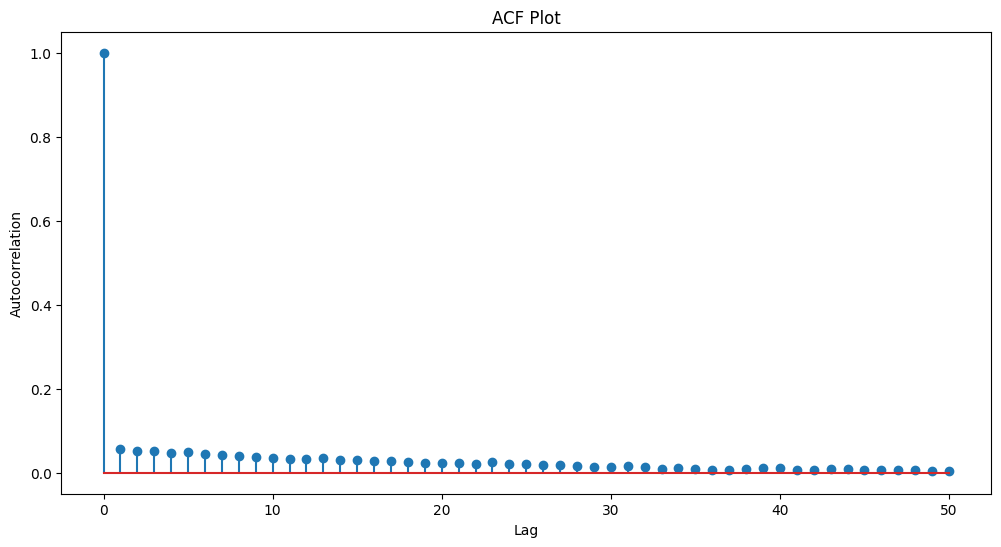

/tmp/ipykernel_14/4157764886.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(pacf_vals)), pacf_vals, use_line_collection=True)


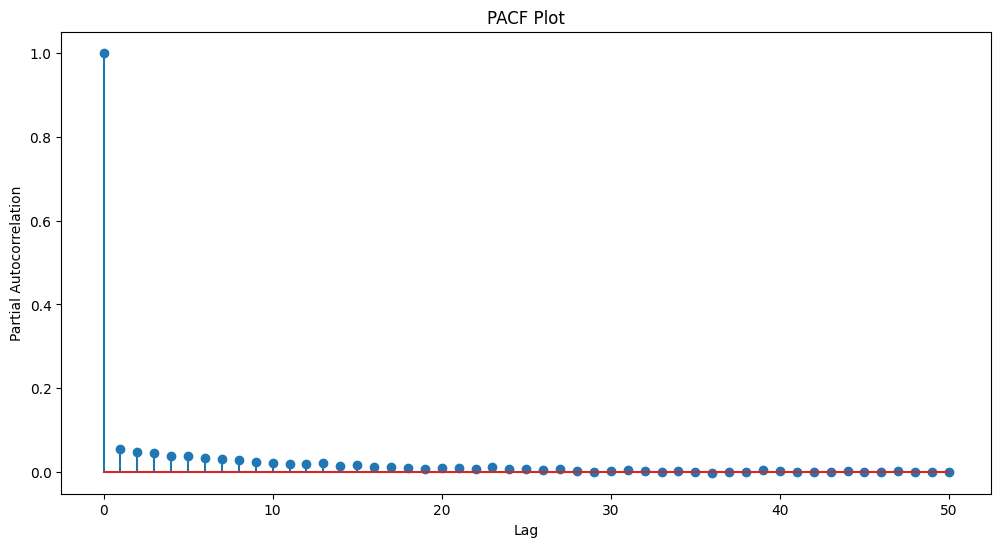

In [5]:
# Stage 2: Model Identification

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Select the 'Energy (kWh)' column from the preprocessed DataFrame
energy_data = df['Energy (kWh)']

# Calculate the ACF and PACF values
acf_vals, conf_int_acf = acf(energy_data, nlags=50, alpha=0.05)
pacf_vals, conf_int_pacf = pacf(energy_data, nlags=50, alpha=0.05)

# Print the ACF values
print("ACF values:")
for lag, acf_val in enumerate(acf_vals):
    print(f"Lag {lag + 1}: {acf_val}")

# Print the PACF values
print("PACF values:")
for lag, pacf_val in enumerate(pacf_vals):
    print(f"Lag {lag + 1}: {pacf_val}")

# Plot the ACF
fig, ax = plt.subplots(figsize=(12, 6))
plt.stem(range(len(acf_vals)), acf_vals, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

# Plot the PACF
fig, ax = plt.subplots(figsize=(12, 6))
plt.stem(range(len(pacf_vals)), pacf_vals, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF Plot')
plt.show()


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Define the optimal parameter values
p = 2
d = 0
q = 1

# Fit the ARIMA model
model = ARIMA(df['Energy (kWh)'], order=(p, d, q), enforce_stationarity=False)
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Energy (kWh)   No. Observations:               259166
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2054.276
Date:                Thu, 11 May 2023   AIC                           4118.552
Time:                        00:42:09   BIC                           4170.878
Sample:                             0   HQIC                          4133.781
                             - 259166                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3551      0.001    317.568      0.000       0.353       0.357
ar.L1          0.9582      0.003    293.051      0.000       0.952       0.965
ar.L2         -0.0018      0.002     -0.862      0.3

The output of the ARIMA model suggests that the model has been successfully fitted to the data. Here are some key points from the model summary:

The optimal parameter values used are ARIMA(2, 0, 1), indicating an autoregressive order of 2, a differencing order of 0, and a moving average order of 1.
The estimated coefficients for the AR and MA terms are as follows:
AR(1): 0.9582
AR(2): -0.0018
MA(1): -0.9177
The constant term (const) is estimated to be 0.3551.
The estimated variance of the residuals (sigma2) is 0.0595.
Some additional information provided by the model summary includes the Ljung-Box test for autocorrelation (Q-value), the Jarque-Bera test for normality (JB-value), and the heteroskedasticity test (H-value).

Overall, the model seems to fit the data well, as indicated by the low AIC and BIC values and the significant coefficients. However, it's important to further evaluate the model's performance through diagnostic checks, such as examining residual plots, conducting hypothesis tests, and assessing forecast accuracy.

Residual Analysis: Plotting the residuals helps us assess if they exhibit any patterns or remaining structure that the model did not capture.

Ljung-Box Test: This test helps determine if the residuals are autocorrelated or exhibit any significant residual patterns.

Jarque-Bera Test: This test assesses if the residuals follow a normal distribution.

Forecast Evaluation: Comparing the model's forecasts to the actual values can provide insights into the accuracy of the predictions.

In [7]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

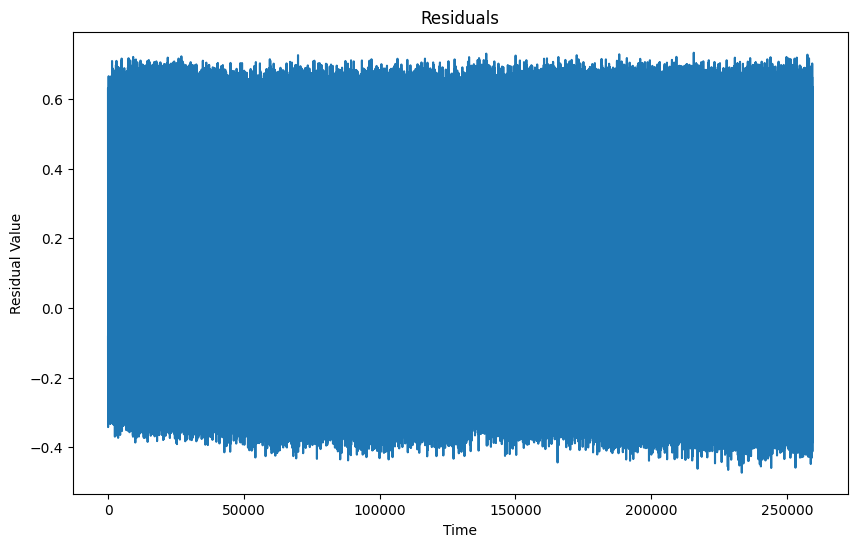

<Figure size 800x400 with 0 Axes>

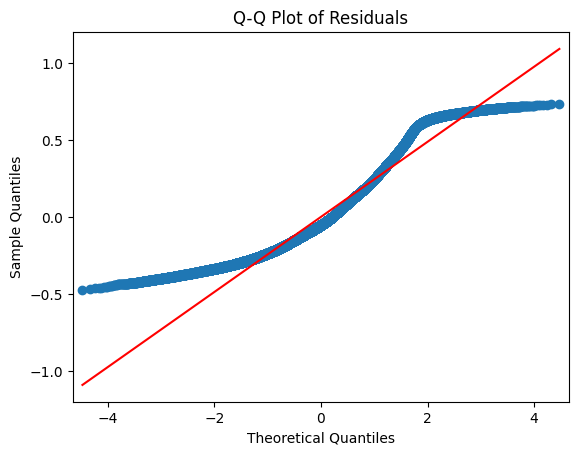

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

# Get the residuals
residuals = model_fit.resid

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

# Q-Q plot of the residuals
plt.figure(figsize=(8, 4))
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [15]:
# Ljung-Box test for residual autocorrelation
_, p_value = acorr_ljungbox(residuals, lags=20)
print(f'Ljung-Box test p-values:\n{p_value}')

# Jarque-Bera test for normality of residuals
_, p_value = jarque_bera(residuals)
print(f'Jarque-Bera test p-value: {p_value}')

Ljung-Box test p-values:
lb_pvalue
Jarque-Bera test p-value: 0.0


In [14]:
print(test_data.columns)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date', 'End Date',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')
